In [2]:
import numpy as np                  #importing numpy 
import matplotlib.pyplot as plt    #importing matplotlib.pyplot
from scipy import optimize         # from scipy importing optimize
%matplotlib inline
#Array of max temperatures in a city In India for each months of the year.
temp_max = np.array([39, 41, 43, 47, 49, 51, 45, 38, 37, 29, 27, 25]) 

#Array of min temperatures in a city In India for each months of the year.
temp_min = np.array([21, 23, 27, 28, 32, 35, 31, 28, 21, 19, 17, 18]) 
months = np.arange(12) # Array of months in a year

In [3]:
# 1. fitting it to the periodic function
#calulating yearly temperature
def yearly_temps(times, avg, ampl, time_offset):
    return (avg + ampl * np.cos((times + time_offset) * 1.8 * np.pi / times.max()))

#curve_fit returns Residual Max/min and Covariance of residual max/min
res_max, cov_max = optimize.curve_fit(yearly_temps, months,temp_max, [40, 20, 0])
res_min, cov_min = optimize.curve_fit(yearly_temps, months,temp_min, [-40, 20, 0])

Text(0,0.5,'Temperature ($^\\circ$C)')

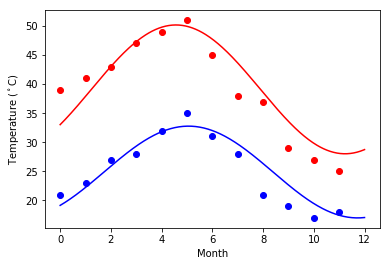

In [4]:
# 2. Plotting the fit data
days = np.linspace(0, 12, num=365)

plt.figure()
plt.plot(months, temp_max, 'ro') #plotting max temperatures with respect to months in red circles
plt.plot(days, yearly_temps(days, *res_max), 'r-') #plotting yearly max temperatures with respect to days in red lines
plt.plot(months, temp_min, 'bo') #plotting min temperatures with respect to months in blue circles
plt.plot(days, yearly_temps(days, *res_min), 'b-') #plotting yearly min temperatures with respect to days in blue lines
plt.xlabel('Month') # x label
plt.ylabel('Temperature ($^\circ$C)') # y label


In [3]:
import pandas as pd  # importing pandas library
import matplotlib.pyplot as plt  # importing matplotlib.pyplot
%matplotlib inline
url='https://raw.githubusercontent.com/Geoyi/Cleaning-Titanic-Data/master/titanic_original.csv'
titanic = pd.read_csv(url) # reading data from csv file
titanic.head() # displaying first 5 results

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Text(0.5,1,'Fare paid and the Age')

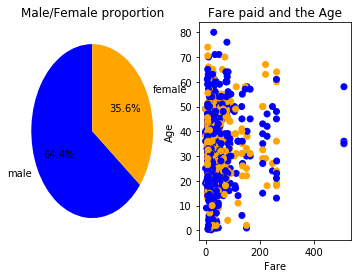

In [35]:
# 1.  Create a pie chart presenting the male/female proportion
count=titanic['sex'].value_counts() # fetching value count of sex
colors = ['blue', 'orange'] # assigning colors
f, (ax1, ax2) = plt.subplots(1,2) # creating subplot

#Axis 1 with pie chart
ax1.pie(count.values.tolist(), labels=count.index.values.tolist(), colors=colors,startangle=90,autopct='%.1f%%')
ax1.set_title('Male/Female proportion') # setting title

# 2. Create a scatterplot with the Fare paid and the Age, differ the plot color by gender

colors = {'male':'blue', 'female':'orange'} # assigning colors in key value pairs
#Axis 2 with scatter plot
ax2.scatter(titanic.fare,titanic.age,c=titanic['sex'].iloc[:-1].apply(lambda x:colors[x]))
ax2.set_xlabel('Fare') # x label
ax2.set_ylabel('Age')  # y label
ax2.set_title('Fare paid and the Age') #title